Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ 
The data consists of those diagnosed with Parkinson Disease and those who do not.	

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

__Load the dataset__

In [4]:
df = pd.read_csv('parkinsons.data')

In [5]:
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
10,phon_R01_S02_5,88.333,112.240,84.072,0.00505,0.00006,0.00254,0.00330,0.00763,0.02143,...,0.03237,0.01166,21.118,1,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
184,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,...,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
12,phon_R01_S04_1,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,...,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512


__It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)__

In [6]:
df.info()
df['status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

1    147
0     48
Name: status, dtype: int64

In [7]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

The given data has 24 columns/features

1. Column "name" is of object datatype and is a combination of characters and number in a specific format
2. "status" column has two values 0 and 1. 0 implies the absence of parkinson's disease and 1 indicates the presence of Parkinson's disease
3. All other attributes are numeric
4. There are 23 independent columns/ features with one target variable('Status') 

No missing values found in the dataset

__Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)__

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


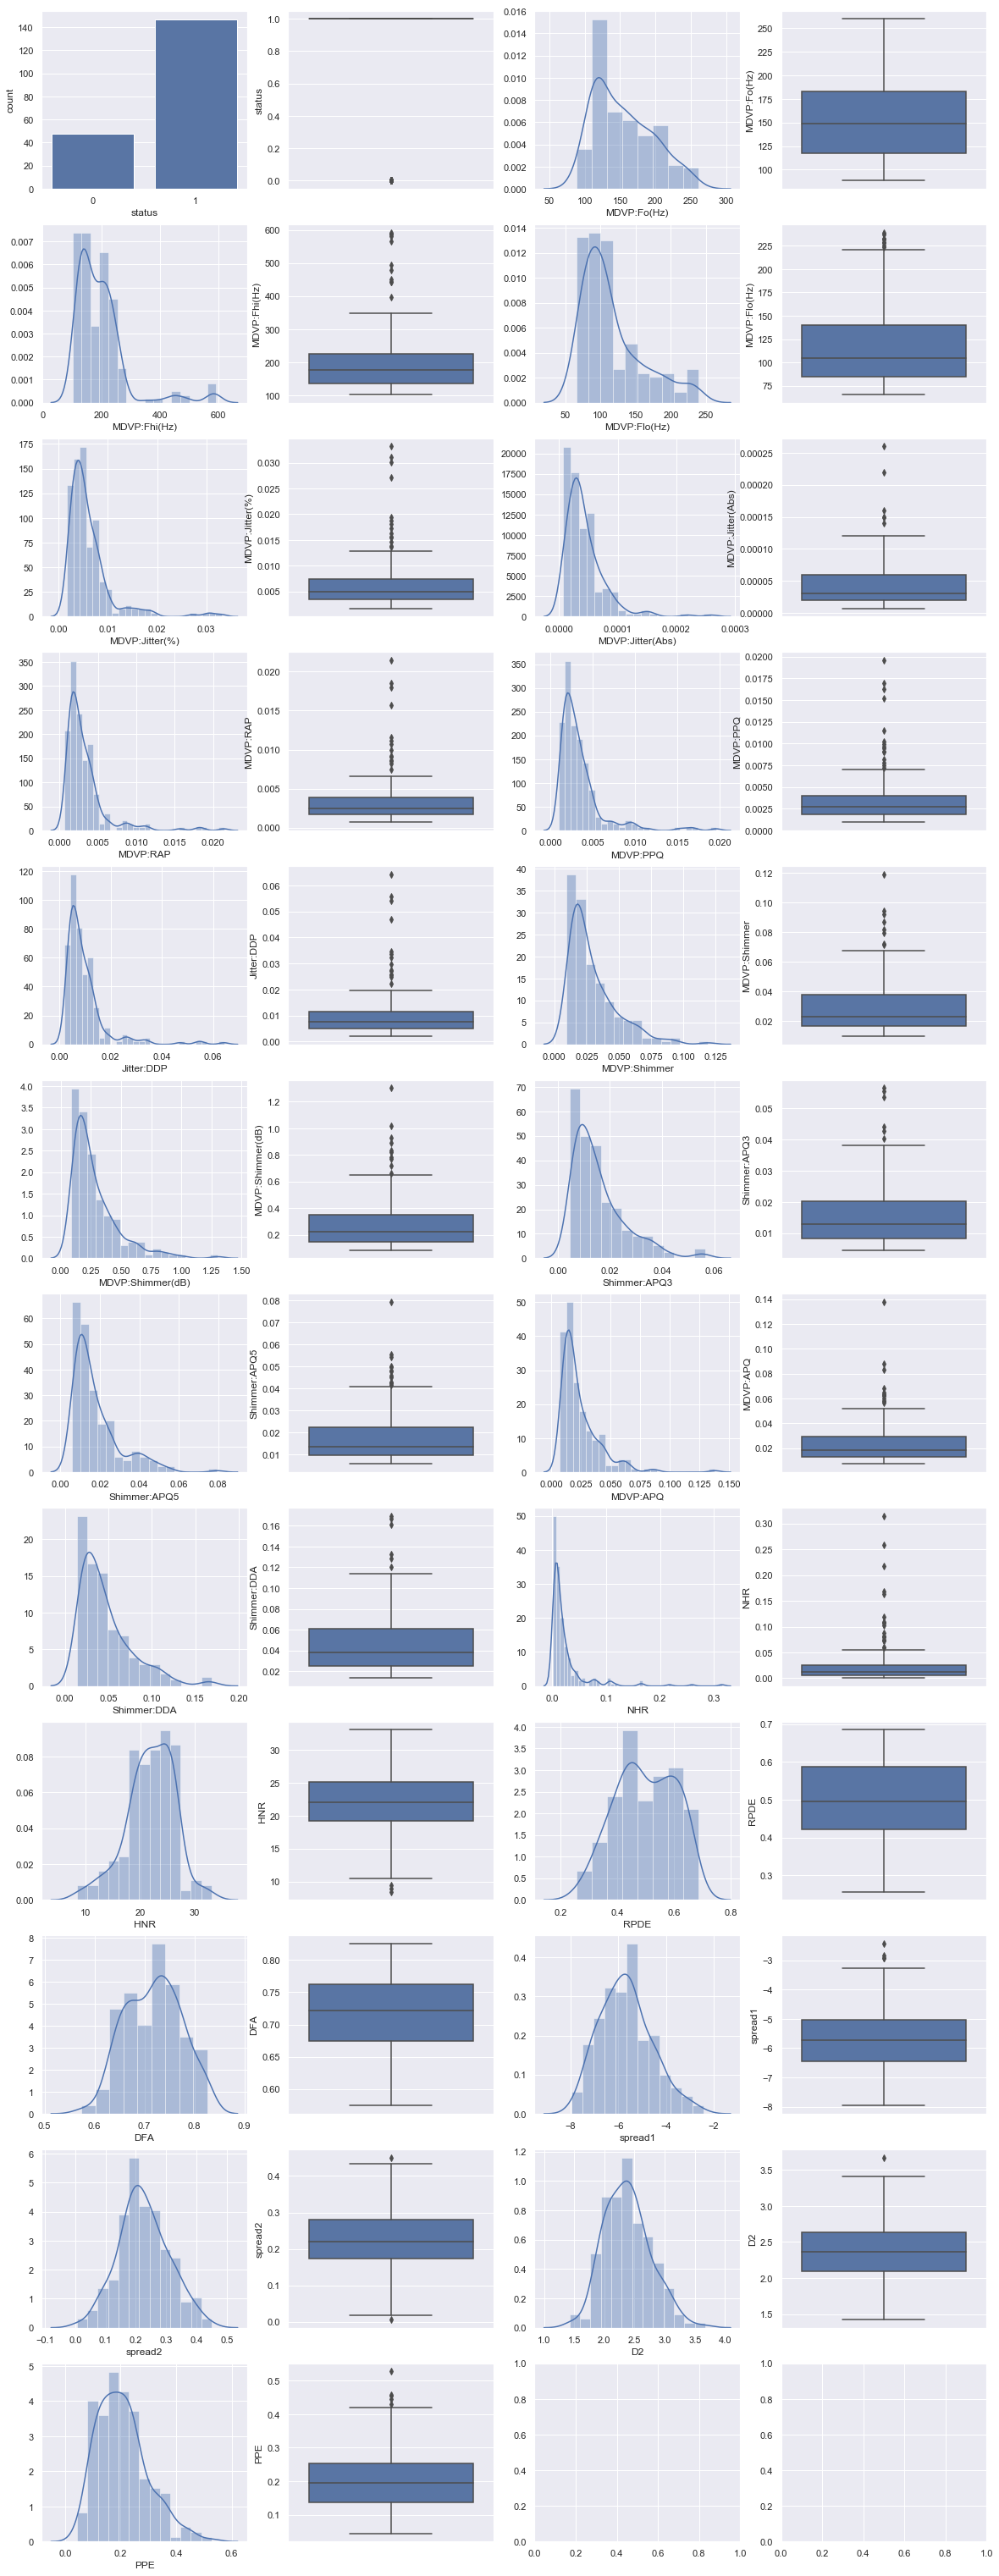

In [9]:
fig, axes = plt.subplots(12,4, figsize = (20,55))

r = 0
c = 0
cols = ['status','MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

for col in cols:
    if col=='status':
        sns.countplot(df[col], ax=axes[r, c], color='b')
    else:
        sns.distplot(df[col], ax=axes[r, c], color='b')
    
    sns.boxplot(y=df[col], ax=axes[r, c+1])
    if c == 2:
        r += 1
        c = 0
    else:
        c += 2

1. For status column Out of 195 observations, 147 (75%) are with PD and only 48 (25%) are healthy. As the healthy are few and less than the lower tail, it is considered as an outlier
2. MDVP:Fo(Hz) Diplay a slight positive skewed distribution with mean and median are very close to each other
3. MDVP:Fhi(Hz) Positive skewed. Has high outliers
4. MDVP:Flo(Hz) Positive skewed. Has high outliers
5. MDVP:Jitter(%) Positive skewed.Has high outliers
6. MDVP:Jitter(Abs) Positive skewed.Has high outliers
7. MDVP:RAP Positive skewed.Has high outliers
8. MDVP:PPQ Positive skewed.Has high outliers
9. Jitter:DDP|Positive skewed.Has high outliers
10. MDVP:Shimmer Positive skewed.Has high outliers
11. MDVP:Shimmer(dB) Positive skewed. Has high outliers
12. Shimmer:APQ3 Positive skewed. Has high outliers
13. Shimmer:APQ5 Positive skewed. Has high outliers
14. MDVP:APQ Positive skewed. Has high outliers
15. Shimmer:DDA Positive skewed. Has high outliers
16. NHR Positive skewed. Has high outliers
17. HNR Negative skewed. Has low outliers
18. RPDE Slightly negative skewed. No Outliers.
19. DFA Close to symmetric normal distribution. No Outliers
20. spread1 Close to symmetric normal distribution. Has high outliers
21. spread2 Close to symmetric normal distribution. Has both low and high outliers
22. D2 Close to symmetric normal distribution. Has high outliers
23. PPE Slightly positive skewed. Has high outliers

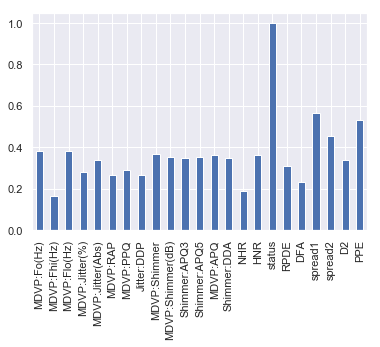

In [10]:
df.corr().abs()['status'].plot.bar()

In [11]:
corr_matrix = df.corr().abs()

corr_matrix = pd.DataFrame(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack(), columns=['Correlation Value (abs)'])

corr_matrix[corr_matrix['Correlation Value (abs)']>=0.8].sort_values('Correlation Value (abs)', ascending=False).round(2)

Correlation Value (abs)
Shimmer:APQ3     Shimmer:DDA                          1.00
MDVP:RAP         Jitter:DDP                           1.00
MDVP:Jitter(%)   Jitter:DDP                           0.99
                 MDVP:RAP                             0.99
MDVP:Shimmer     Shimmer:DDA                          0.99
                 Shimmer:APQ3                         0.99
                 MDVP:Shimmer(dB)                     0.99
                 Shimmer:APQ5                         0.98
MDVP:Jitter(%)   MDVP:PPQ                             0.97
MDVP:Shimmer(dB) Shimmer:APQ5                         0.97
                 Shimmer:DDA                          0.96
                 Shimmer:APQ3                         0.96
spread1          PPE                                  0.96
MDVP:Shimmer(dB) MDVP:APQ                             0.96
Shimmer:APQ5     Shimmer:DDA                          0.96
Shimmer:APQ3     Shimmer:APQ5                         0.96
MDVP:PPQ         Jitter:DDP                           0.96
MDVP:RAP         MDVP:PPQ                             0.96
MDVP:Shimmer     MDVP:APQ                             0.95
Shimmer:APQ5     MDVP:APQ                             0.95
MDVP:Jitter(%)   MDVP:Jitter(Abs)                     0.94
MDVP:Jitter(Abs) Jitter:DDP                           0.92
                 MDVP:RAP                             0.92
Jitter:DDP       NHR                                  0.92
MDVP:RAP         NHR                                  0.92
MDVP:Jitter(%)   NHR                                  0.91
MDVP:Jitter(Abs) MDVP:PPQ                             0.90
MDVP:APQ         Shimmer:DDA                          0.90
Shimmer:APQ3     MDVP:APQ                             0.90
MDVP:PPQ         NHR                                  0.84
                 MDVP:Shimmer(dB)                     0.84
MDVP:Shimmer     HNR                                  0.84
MDVP:Jitter(Abs) NHR                                  0.83
MDVP:Shimmer(dB) HNR                                  0.83
Shimmer:DDA      HNR                                  0.83
Shimmer:APQ3     HNR                                  0.83
Shimmer:APQ5     HNR                                  0.81
MDVP:Jitter(%)   MDVP:Shimmer(dB)                     0.80
MDVP:PPQ         MDVP:APQ                             0.80
MDVP:APQ         HNR                                  0.80

Observations from Bi-variate Analysis:
- The target variable (status) has very low correlation (corr. value < 0.6) with independent variables.
- "spread1", "PPE" and "spread2" are the top 3 associated attributes for the target variable. However, possesses very low correlation between themselves.
So, building a good accuracy model would be a challenge

There are many highly correlated independent variables.

In [12]:
df = df.drop('name', axis=1)

In [13]:
# capture the target column ("status") into separate vectors for training set and test set

X = df.drop("status" , axis=1)

y = df['status']

__Split the dataset into training and test set in the ratio of 70:30 (Training:Test).__

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

__Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)__

In [15]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt_model.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [16]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_data.columns).sort_values('Imp', ascending=False))

                       Imp
PPE               0.387263
MDVP:Fo(Hz)       0.219150
Shimmer:DDA       0.106000
MDVP:Fhi(Hz)      0.099800
D2                0.079409
DFA               0.067644
Jitter:DDP        0.040734
MDVP:Flo(Hz)      0.000000
spread2           0.000000
spread1           0.000000
RPDE              0.000000
HNR               0.000000
NHR               0.000000
MDVP:APQ          0.000000
MDVP:Jitter(%)    0.000000
Shimmer:APQ3      0.000000
MDVP:Shimmer(dB)  0.000000
MDVP:Shimmer      0.000000
MDVP:PPQ          0.000000
MDVP:RAP          0.000000
MDVP:Jitter(Abs)  0.000000
Shimmer:APQ5      0.000000


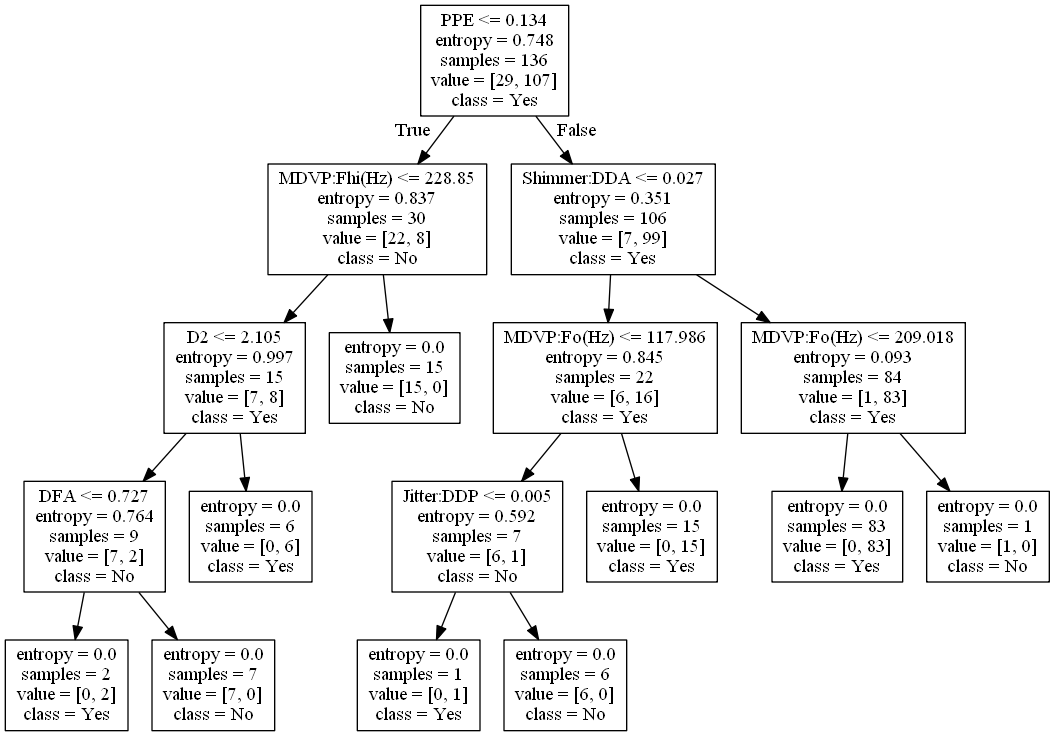

In [17]:
train_label_values = ['No', 'Yes']
from IPython.display import Image  
from sklearn import tree
from os import system

pd_tree_file = open('pd_tree.dot', 'w')
dot_data = tree.export_graphviz(dt_model, out_file=pd_tree_file, feature_names = list(train_data), class_names = list(train_label_values))

pd_tree_file.close()

system("dot -Tpng pd_tree.dot -o pd_tree.png")
Image("pd_tree.png")

__Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)__

In [18]:
test_predict = dt_model.predict(test_data)
print(dt_model.score(train_data , train_labels))
print(dt_model.score(test_data , test_labels))

1.0
0.864406779661017


Observations:
1. The decision tree is based on the training set and since none of the regularisation method is used the accuracy is showing as 100%
2. Whereas on the test set the accuracy is dropped to 86% as this data is not seen by the model. This is because of the over fitting model
We can improve the model by regularising (by playing with hyperparameters)

In [19]:
from sklearn import metrics

pd.DataFrame(metrics.confusion_matrix(test_predict, test_labels), columns=['Actual No', 'Actual Yes'], index=['Predicted No', 'Predicted Yes'])

,Actual No,Actual Yes
Predicted No,12,1
Predicted Yes,7,39


The class of interest to us is status=1 (with PD).

__Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)__

In [20]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth': range(1, 22), 'min_samples_leaf': range(2, 20)}

In [21]:
tr = DecisionTreeClassifier(criterion = 'entropy', random_state=1)

grsearch = GridSearchCV(tr, param)
grsearch.fit(train_data, train_labels)

reg_dt_model = grsearch.best_estimator_
reg_dt_model

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [22]:
reg_dt_model.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

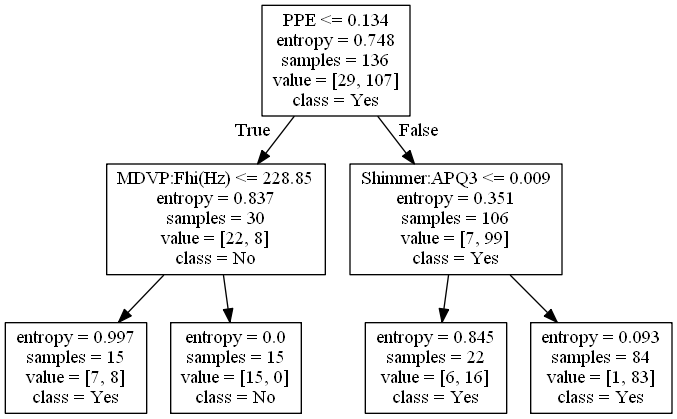

In [23]:
reg_pd_tree_file = open('reg_pd_tree.dot', 'w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=reg_pd_tree_file, feature_names = list(train_data), class_names = list(train_label_values))

reg_pd_tree_file.close()
system("dot -Tpng reg_pd_tree.dot -o reg_pd_tree.png")
Image("reg_pd_tree.png")

In [24]:
test_predict = reg_dt_model.predict(test_data)

In [25]:
print(reg_dt_model.score(train_data , train_labels))
print(reg_dt_model.score(test_data , test_labels))

0.8970588235294118
0.7966101694915254


In [26]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = train_data.columns).sort_values('Imp', ascending=False))

                       Imp
PPE               0.652988
Shimmer:APQ3      0.178733
MDVP:Fhi(Hz)      0.168280
MDVP:APQ          0.000000
D2                0.000000
spread2           0.000000
spread1           0.000000
DFA               0.000000
RPDE              0.000000
HNR               0.000000
NHR               0.000000
Shimmer:DDA       0.000000
MDVP:Fo(Hz)       0.000000
MDVP:Shimmer(dB)  0.000000
MDVP:Shimmer      0.000000
Jitter:DDP        0.000000
MDVP:PPQ          0.000000
MDVP:RAP          0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:Jitter(%)    0.000000
MDVP:Flo(Hz)      0.000000
Shimmer:APQ5      0.000000


In [27]:
pd.DataFrame(metrics.confusion_matrix(test_predict, test_labels), columns=['Actual No', 'Actual Yes'], index=['Predicted No', 'Predicted Yes'])

,Actual No,Actual Yes
Predicted No,7,0
Predicted Yes,12,40


Observations:
1. Regularization helped us to prevent the overfitting in our DecisionTreeClassifier model
2. This is because we control the behavior of the cart algorithm while working with our dataset by hyperparameters
3. We have introduced the following 2 hyperparameters
4. max_depth - this instructs the cart algorithm that how deep the split can go from the root node
5. max_sample_leaf - this instructs the cart algorithm that the minimum number of samples a leaf node must have
6. As part of regularization, we used Grid search, which is the process of performing hyper parameter tuning in order to determine the optimal values for the given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.
7. With regularization, the difference between the accuracy scores of training and test dataset has been reduced

__Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)__

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
param = {'n_estimators': np.arange(1, 165)}
tr = RandomForestClassifier(criterion = 'entropy', random_state=7)

grsearch = GridSearchCV(tr, param)
grsearch.fit(train_data, train_labels)

rfcl = grsearch.best_estimator_
rfcl

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [30]:
rfcl = rfcl.fit(train_data, train_labels)

y_predict = rfcl.predict(test_data)

print(rfcl.score(test_data , test_labels))

0.847457627118644


In [31]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[11  8]
 [ 1 39]]


The accuracy and the metrics shows a higher results when the Decision trees model is used. hence for this case using the decision tree model would be the best fit.